In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

1. Write a function

In [3]:
def country_covid_plot(dataframe, country_list):
    for i in country_list:
        fig, ax = plt.subplots(figsize = (14,7))
        ax.plot(dataframe.columns, dataframe.loc[i])
    
        x_label = []
        for j in range(0, dataframe.shape[1], 50):
            x_label.append(list(dataframe.columns)[j])
        x_index = []
        for k in range(0, dataframe.shape[1], 50):
            x_index.append(k)
    
        last_date = list(dataframe.columns)[-1]
        x_label.append(last_date)
        x_index.append(dataframe.shape[1])
    
        ax.set_xticks(x_index)
        ax.set_xticklabels(x_label, rotation=90)
    
        ax.set_xlabel('Date')
        ax.set_ylabel('Total # of Covid-19')
        ax.set_title(i)

2. Apply StandardScalar to the data. Each day should have a mean of zero and a StD of 1

In [4]:
scalered_data = StandardScaler().fit_transform(cases_raw)
scalered_data = pd.DataFrame(scalered_data, index = cases_raw.index, columns = cases_raw.columns)

3. Run the function in step 1 on the standardized dataset for the US, China, and Canada

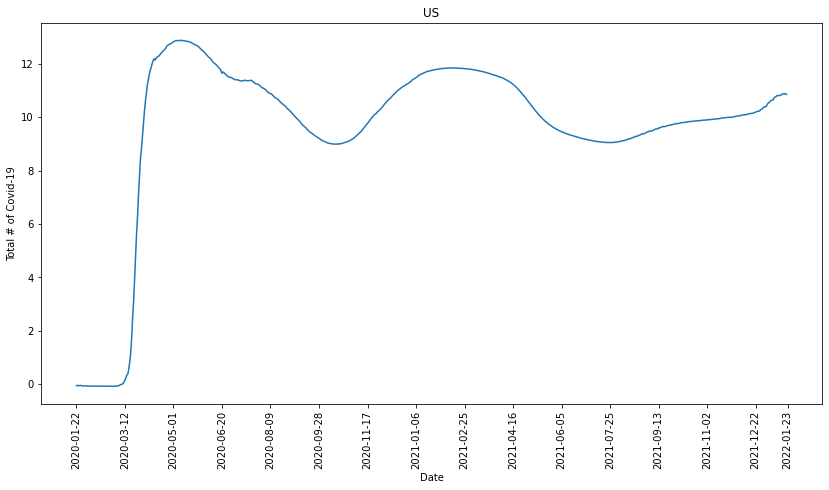

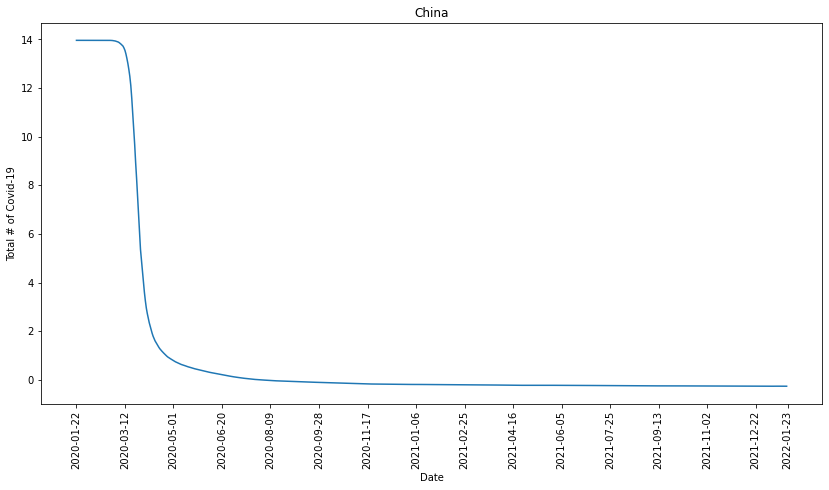

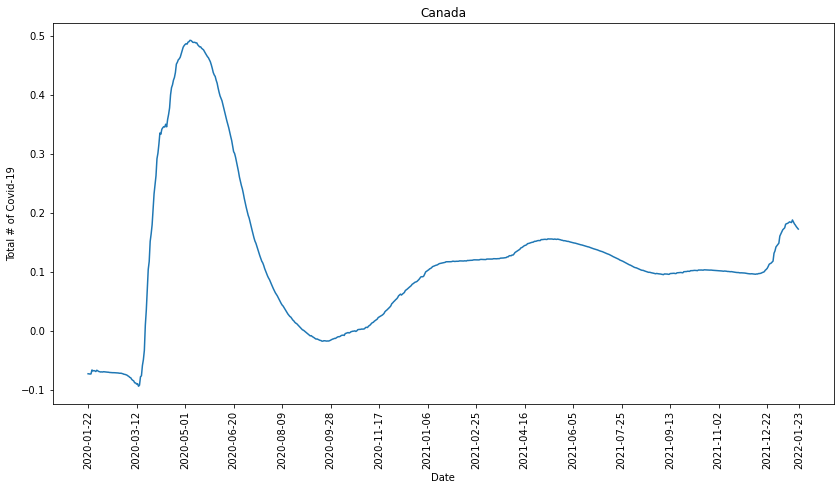

In [5]:
country_list = ['US', 'China', 'Canada']
country_covid_plot(scalered_data, country_list)

4. Discuss the trends in the standardized time-series for the US, Canada, and China. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? 

For the US, at beginning, the curve position is close to 0. This means that, at time 2020.01.22 - 2020.03, the total number of Covid-19 case of US is close to the average level of the world. Then the curve goes up siginificantly in 2020.03 - 2020-05. This means the number of Covid cases increases siginificantly in 2020.03 - 2020-05. Then the curve goes down in 2020.05 - 2020.10 but the curve keeps above the line x=0. This means that the number of covid cases decreases but still: the total number of covid case in US is higher a lot than the average level of the world.

For China, at beginning, the curve position is high which is close to 14. This means at time 2020.01 - 2020.03, China has the most cases in the world and higher than the average level of the world. Then the cureve goes down a lot to the world average level and keeps at the average level. This indicates that the cases decreases a lot and keeps around the world average level.

For Canada, at beginning, the curve position is under 0. The value sign is negative. This means that, at time 2020.01.22 - 2020.03, the total number of Covid-19 case of Canada is below the average level of the world. Then the curve goes up siginificantly in 2020.03 - 2020-06 and the curve goes down significantly in 2020.06 - 2020.09. This means the number of Covid cases increases siginificantly in 2020.03 - 2020-06 and decreases in 2020.06 - 2020.09. In 2020.08 - 2020.09, a negative value happens again. It means the trend in Canada is below the world average level. Then, overall, the number of covid cases is a little higher than (between 0 and 0.2) the world average level.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.5]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.5]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.5]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

1. Compute the covariance matrix of the dataframe. Hint: The dimensions of your covariance matrix should be (733, 733).

In [6]:
# Compute the covariance matrix of the dataframe
covariance_matrix = np.cov(scalered_data.T)
print(pd.DataFrame(covariance_matrix).shape)

(733, 733)


2. Write a function get_sorted_eigen(df_cov)

In [7]:
def get_sorted_eigen(df_cov):
    eigenValues, eigenVectors = np.linalg.eigh(df_cov)
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    return eigenValues, eigenVectors

3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot).

In [8]:
eigenValues, eigenVectors = get_sorted_eigen(covariance_matrix)

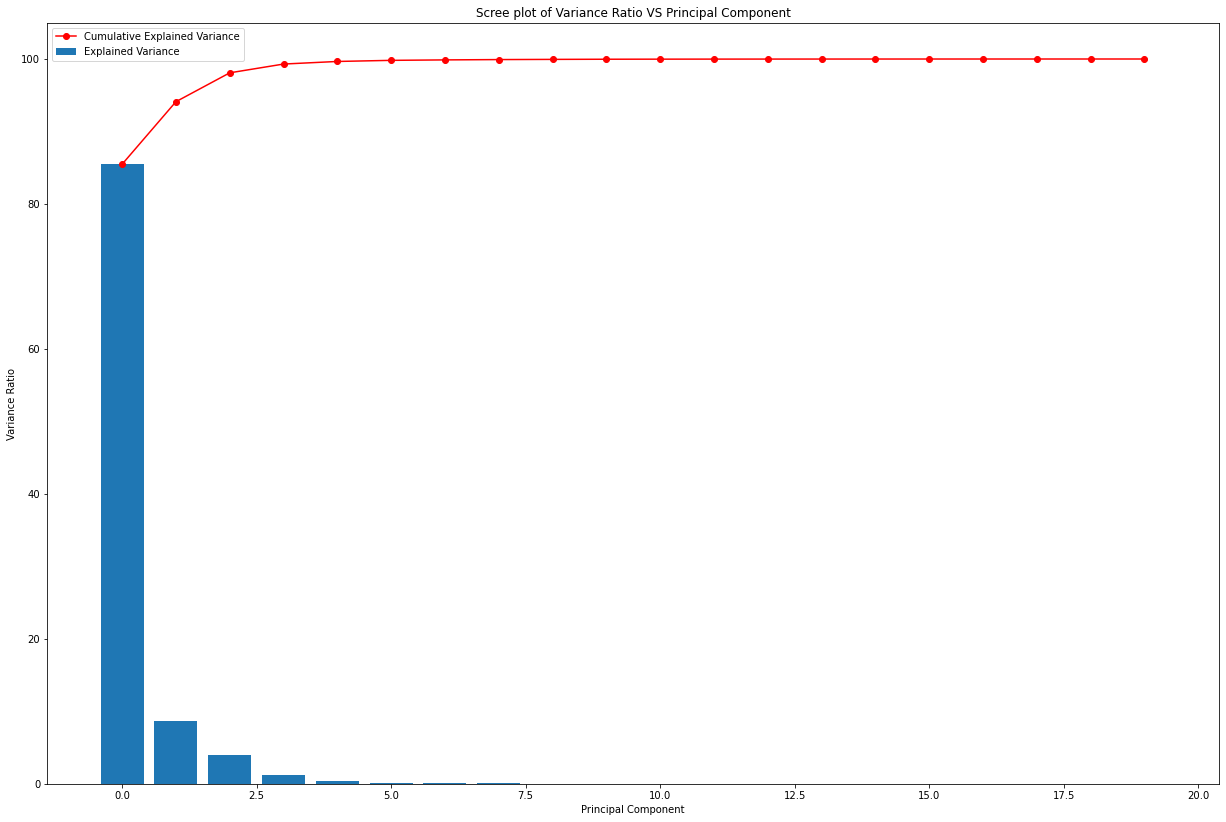

In [9]:
eigenValues_sum = sum(eigenValues)
expVar = [eigV/eigenValues_sum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.figure(figsize=(21,14))
plt.bar(range(20), expVar[0:20], label='Explained Variance')
plt.plot(cumExpVar[0:20], 'r-o', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree plot of Variance Ratio VS Principal Component')
plt.legend()
plt.show()

4. How many PCs do you need to cover 98% of the dataset's variance?

In [10]:
cumExpVar[cumExpVar<99]

array([85.47590445, 94.10558679, 98.08990311])

In [11]:
len(cumExpVar[cumExpVar<99])

3

We need 3 PCs to cover 98% of the dataset's variance.

5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) .

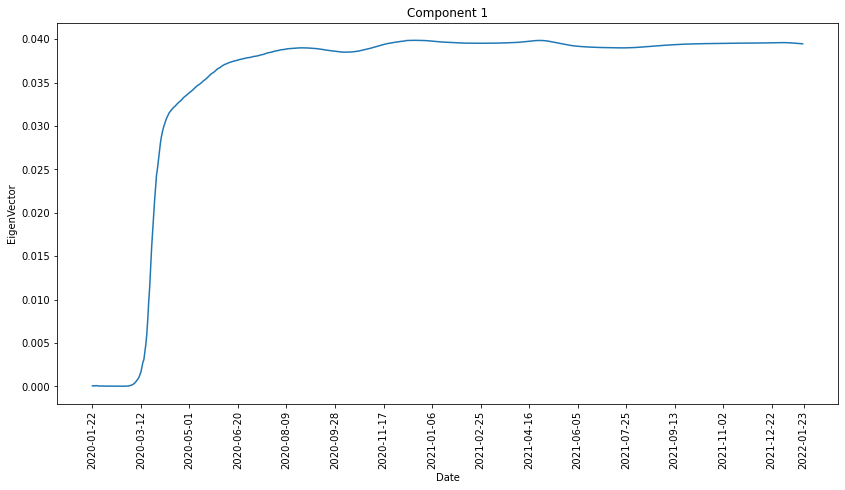

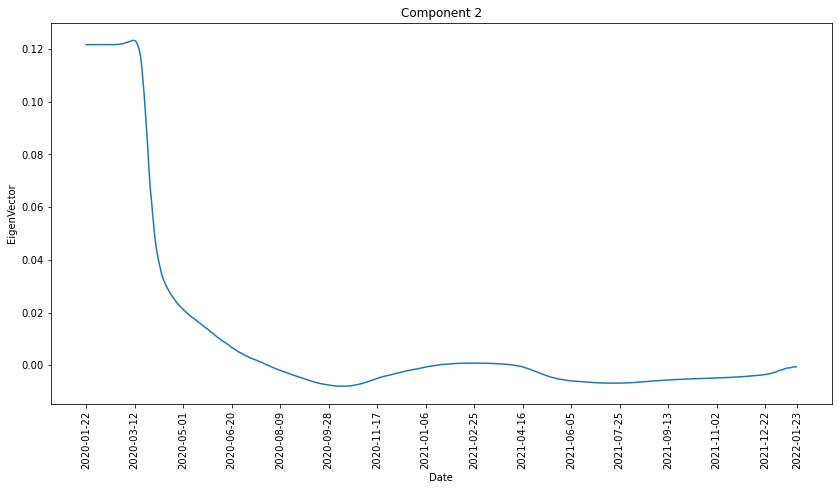

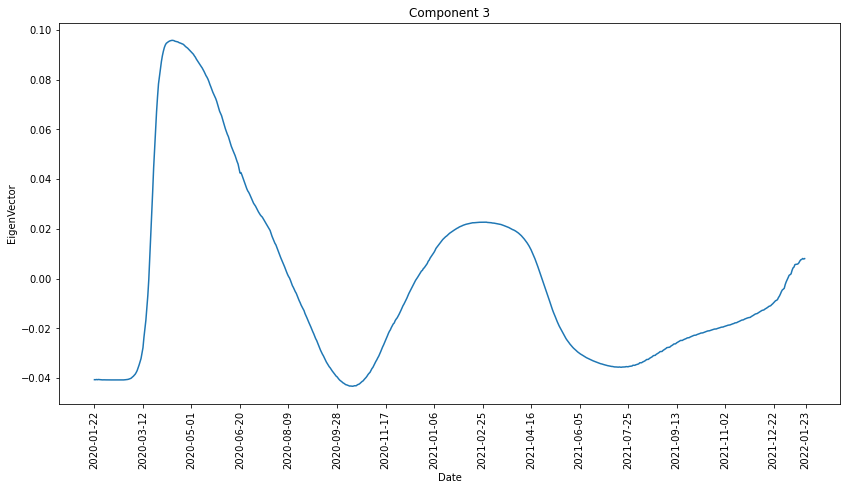

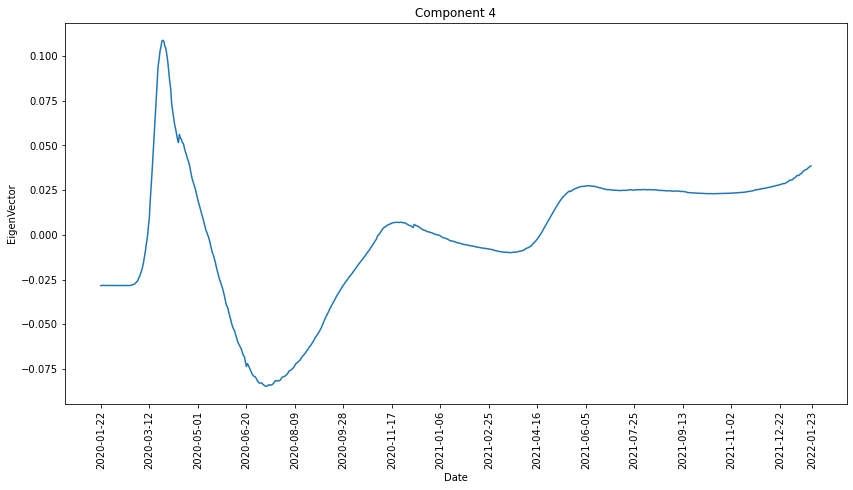

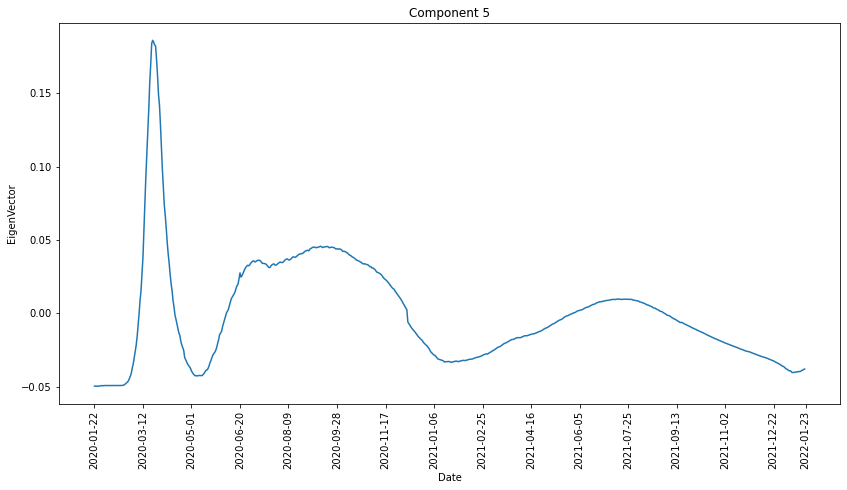

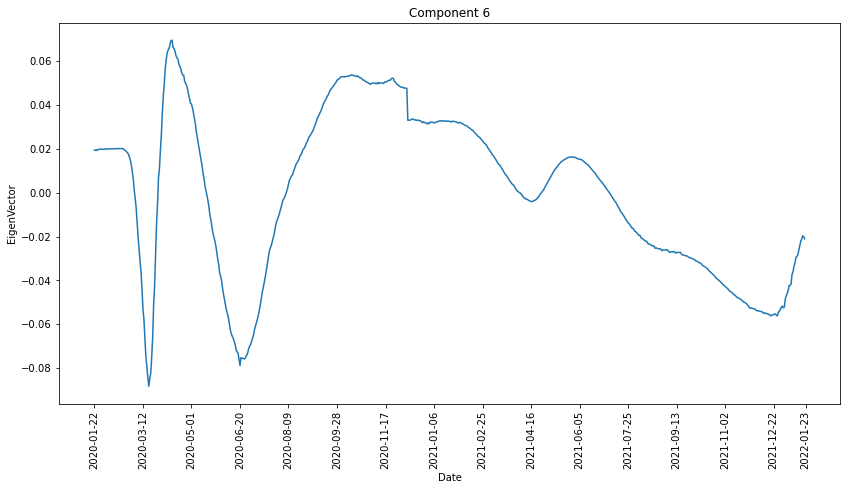

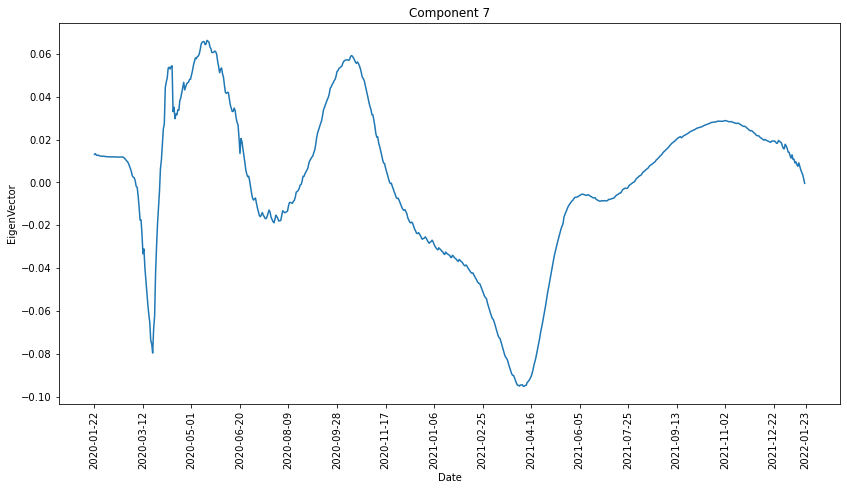

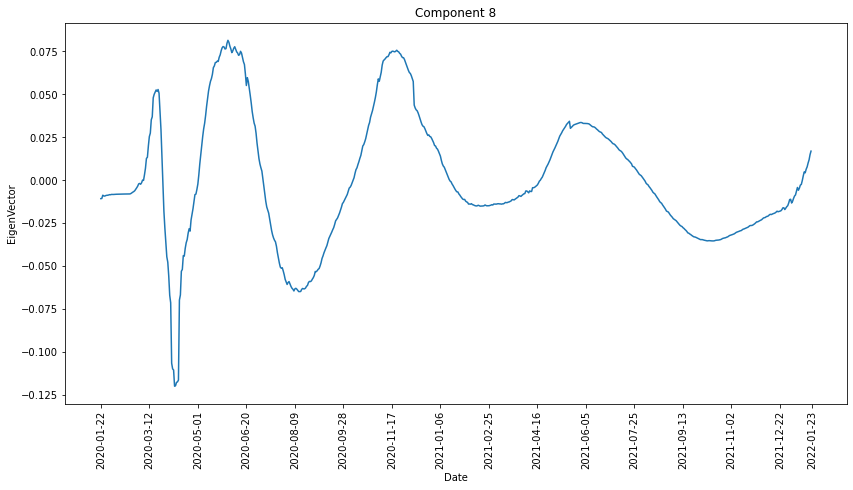

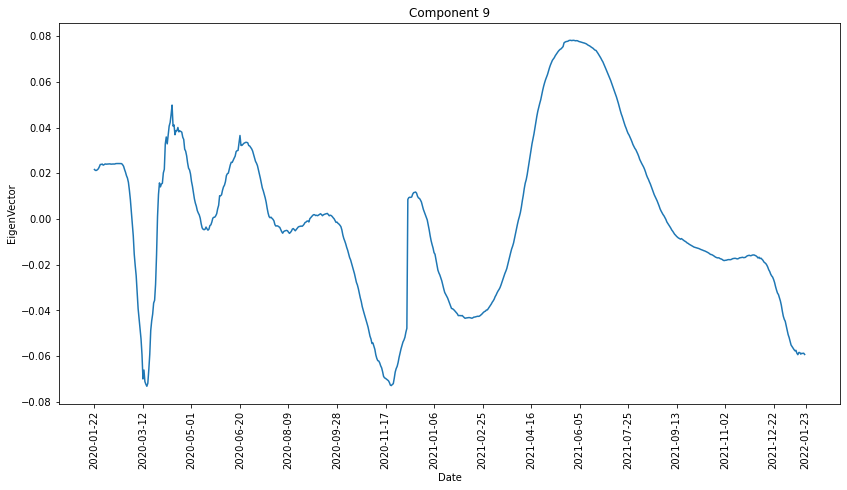

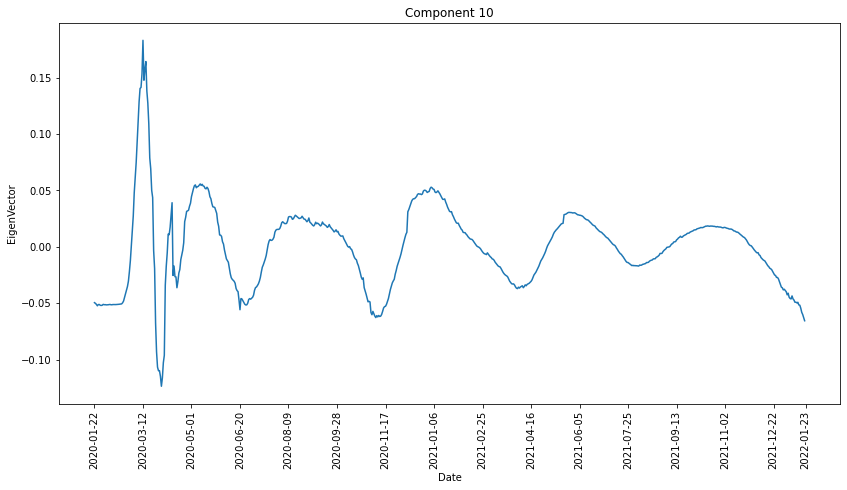

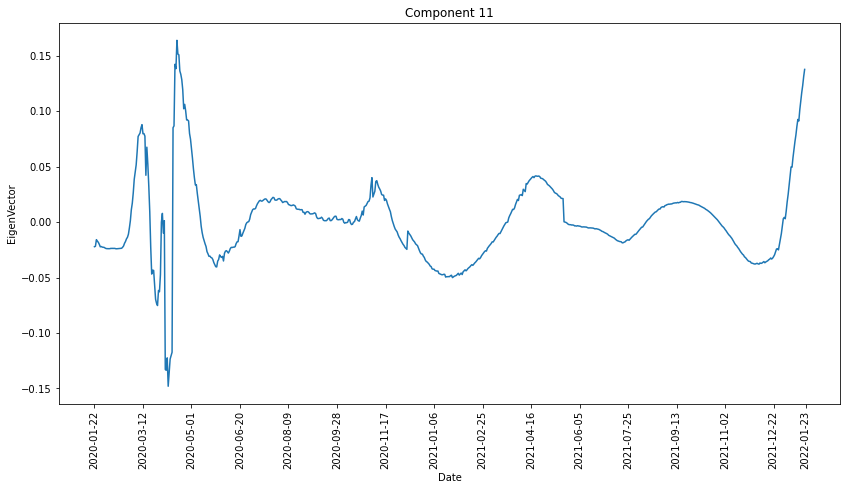

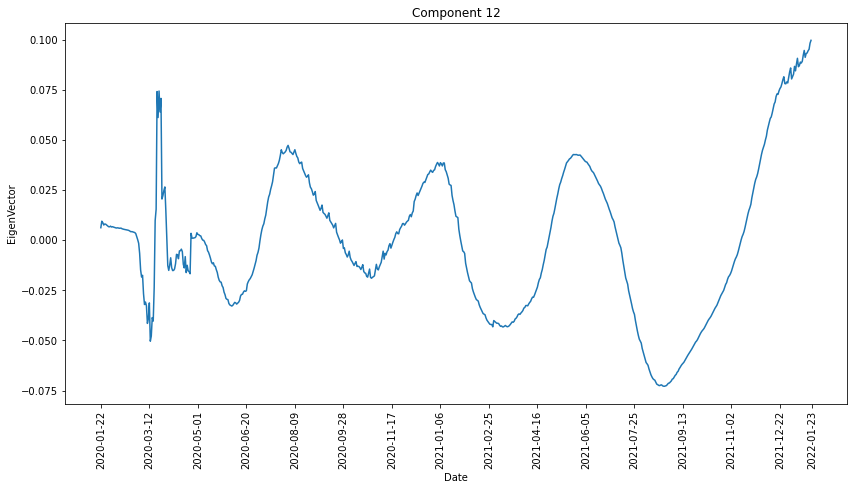

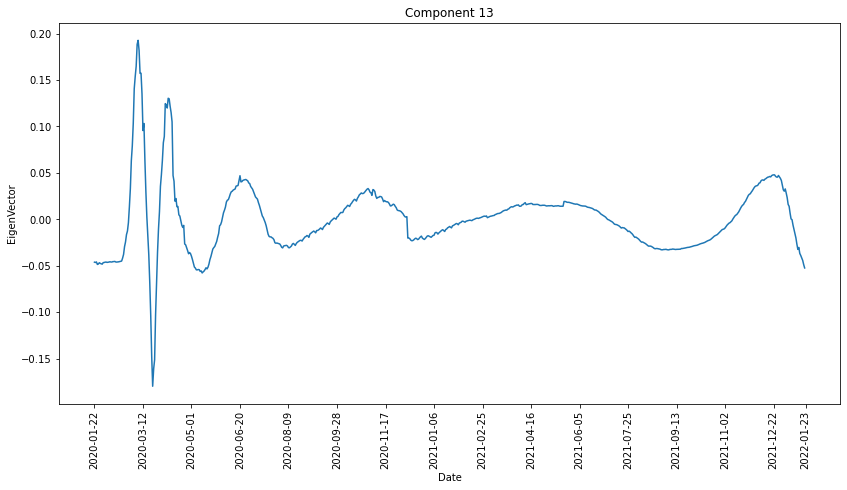

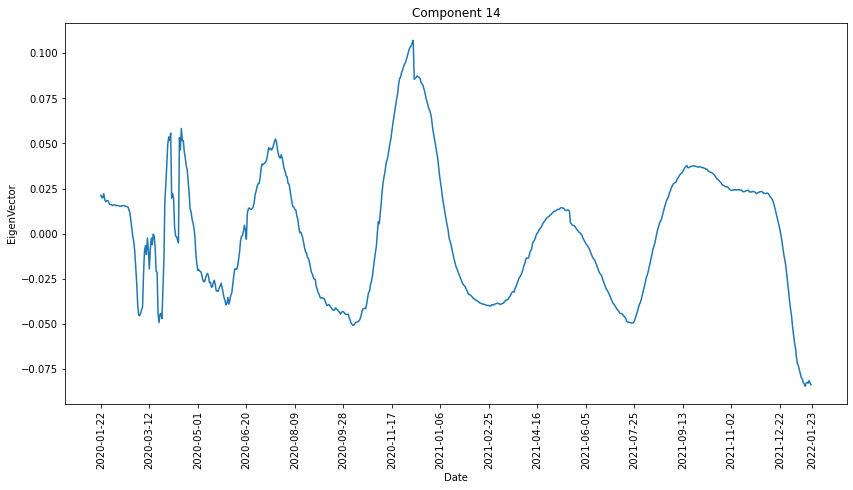

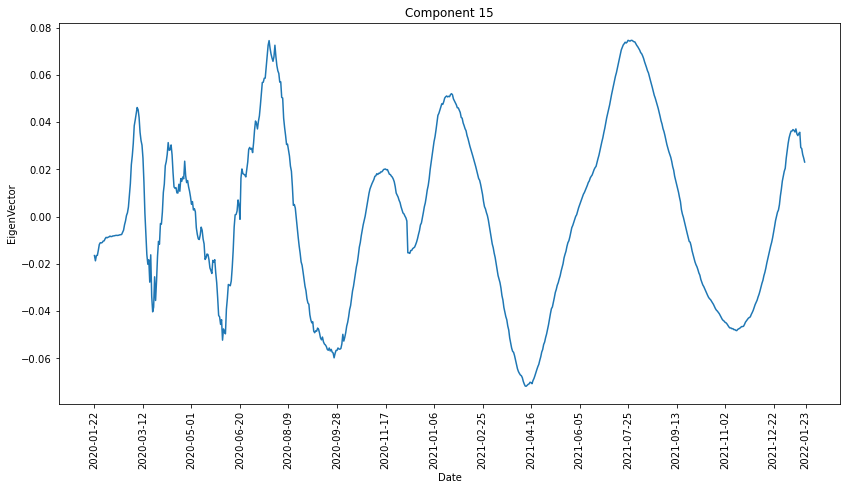

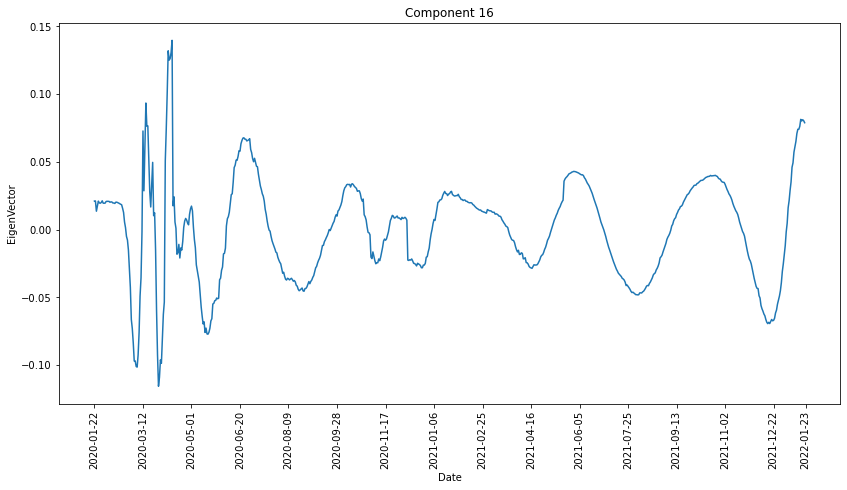

In [12]:
for i in range(16):
    fig, ax = plt.subplots(figsize = (14,7))
    ax.plot(scalered_data.columns, eigenVectors[:,i])
    
    x_label = []
    for j in range(0, scalered_data.shape[1], 50):
        x_label.append(list(scalered_data.columns)[j])
    x_index = []
    for k in range(0, scalered_data.shape[1], 50):
        x_index.append(k)
    
    last_date = list(scalered_data.columns)[-1]
    x_label.append(last_date)
    x_index.append(scalered_data.shape[1])
    
    ax.set_xticks(x_index)
    ax.set_xticklabels(x_label, rotation=90)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('EigenVector')
    ax.set_title('Component '+str(i+1))

6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? 

The plots of the first 4 PCs which has the first 4 maximum eigenvalues, their curves go smoothly. They capture most of the informations. We know that we need first 3 PCs to cover 98% of the dataset's variance. So the first 4 PCs cover more than 98% of the dataset's variance. However, for the rest of the PCs' plot and curve, their trend goes with no rule. These PCs are with smaller eigenvalues and so cover less information and dataset's variance. Some of them includes many noises. So their curves are weird.

# Part 3: Data reconstruction [5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[1]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [13]:
def plot_country_figures(original_df, country_name):
    
    # Compute eigen vectors and eigen values.
    scalered_data = StandardScaler().fit_transform(original_df)
    scalered_data = pd.DataFrame(scalered_data, index = original_df.index, columns = original_df.columns)
    covariance_matrix = np.cov(scalered_data.T)
    eigenValues, eigenVectors = get_sorted_eigen(covariance_matrix)
    
    
    # Plot the original time-series for the specified country
    fig, ax = plt.subplots(figsize = (14,7))
    ax.plot(original_df.columns, original_df.loc[country_name])
    
    x_label = []
    for j in range(0, cases_raw.shape[1], 50):
        x_label.append(list(cases_raw.columns)[j])
    x_index = []
    for k in range(0, cases_raw.shape[1], 50):
        x_index.append(k)
    
    last_date = list(cases_raw.columns)[-1]
    x_label.append(last_date)
    x_index.append(cases_raw.shape[1])
    
    ax.set_xticks(x_index)
    ax.set_xticklabels(x_label, rotation=90)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Total # of Covid-19')
    ax.set_title('Original Data: ' + country_name)
    plt.show()
    
    
    
    # Plot the incremental reconstruction of the original (not standardized) time-series for 
    # the specified country in a single plot
    PC_count_list = [1,2,4,8,16]
    MSE_list = []
    
    plt.figure(figsize=(14,7))
    for PC_count in PC_count_list:
        W = eigenVectors[:, 0:PC_count]
        # Projection
        projX = np.dot(scalered_data, W)
        # Reconstruction
        ReconX = np.dot(projX, W.T)
        # Scale back to the original 
        ReconX = StandardScaler().fit(original_df).inverse_transform(ReconX)
        ReconX = pd.DataFrame(ReconX, index = original_df.index, columns = original_df.columns)
        #Record the MSE, will used to compare each reconstruction 
        MSE = sum((original_df.loc[country_name] - ReconX.loc[country_name])**2) / original_df.shape[1]
        MSE_list.append(MSE)
        # Plot the curve
        plt.plot(original_df.columns, ReconX.loc[country_name], label = 'PC 1 to' + str(PC_count))
    plt.xticks(x_index, x_label, rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Total # of Covid-19')
    plt.title('Reconstruction Data:' + country_name)
    plt.legend()
    plt.show()
    
    
    
    # Plot The residual error for your best reconstruction with respect to the original time-series.
    best_PC_count = PC_count_list[np.argmin(MSE_list)]
    W_best = eigenVectors[:, 0:best_PC_count]
    projX_best = np.dot(scalered_data, W_best)
    ReconX_best = np.dot(projX_best, W_best.T)
    ReconX_best = StandardScaler().fit(original_df).inverse_transform(ReconX_best)
    ReconX_best = pd.DataFrame(ReconX_best, index = original_df.index, columns = original_df.columns)
    plt.figure(figsize=(14,7))
    plt.plot(original_df.columns, original_df.loc[country_name] - ReconX_best.loc[country_name])
    plt.xticks(x_index, x_label, rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Residual Error')
    plt.title('The Best Reconstruction Data:' + 'PC 1 to' + str(best_PC_count))
    plt.show()
    
    
    
    # Plot the RMSE of the reconstruction as a function of the number of included components
    RMSE_list = []
    for i in range(2,102):
        W_RMSE = eigenVectors[:, 0:i]
        projX_RMSE = np.dot(scalered_data, W_RMSE)
        ReconX_RMSE = np.dot(projX_RMSE, W_RMSE.T)
        ReconX_RMSE = StandardScaler().fit(original_df).inverse_transform(ReconX_RMSE)
        ReconX_RMSE = pd.DataFrame(ReconX_RMSE, index = original_df.index, columns = original_df.columns)

        # Compute the RMSE
        MSE_for_RMSE = sum((original_df.loc[country_name] - ReconX_RMSE.loc[country_name])**2) / original_df.shape[1]
        RMSE = np.sqrt(MSE_for_RMSE)
        RMSE_list.append(RMSE)
    plt.figure(figsize=(14,7))
    plt.plot(range(1,101,1), RMSE_list, 'r-o')
    plt.xlabel('The number of components')
    plt.ylabel('RMSE')
    plt.title('RMSE of the components')
    plt.show()

Test your function using the US, Canada, and China as inputs.

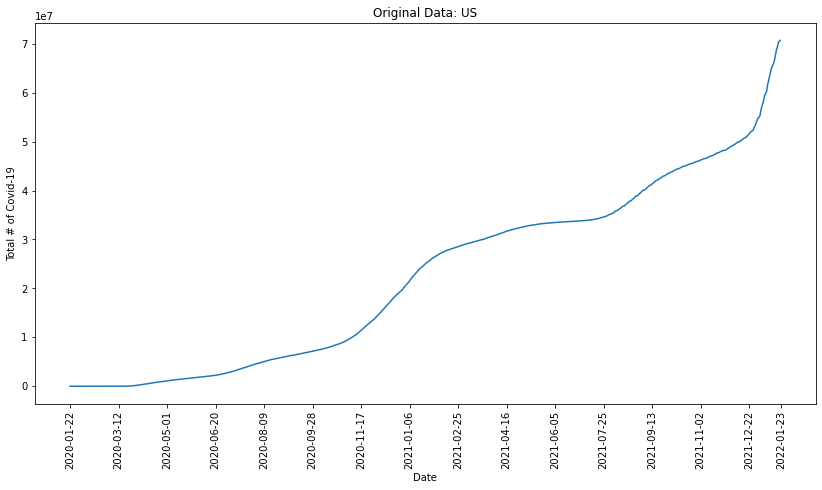

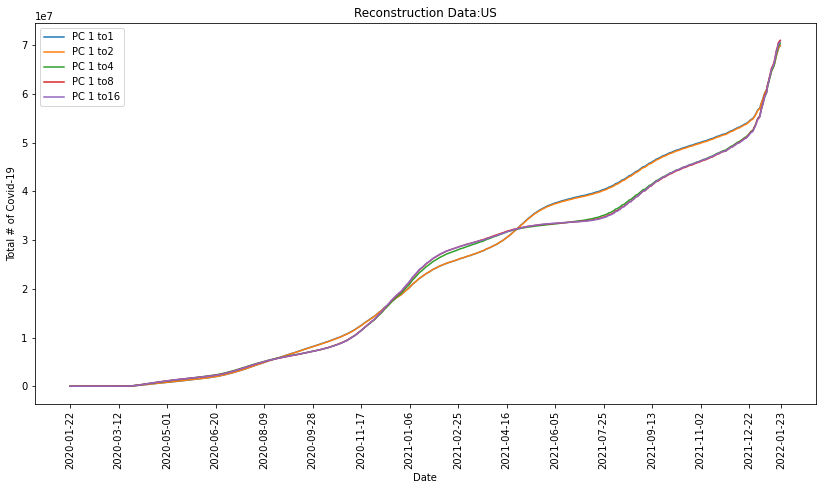

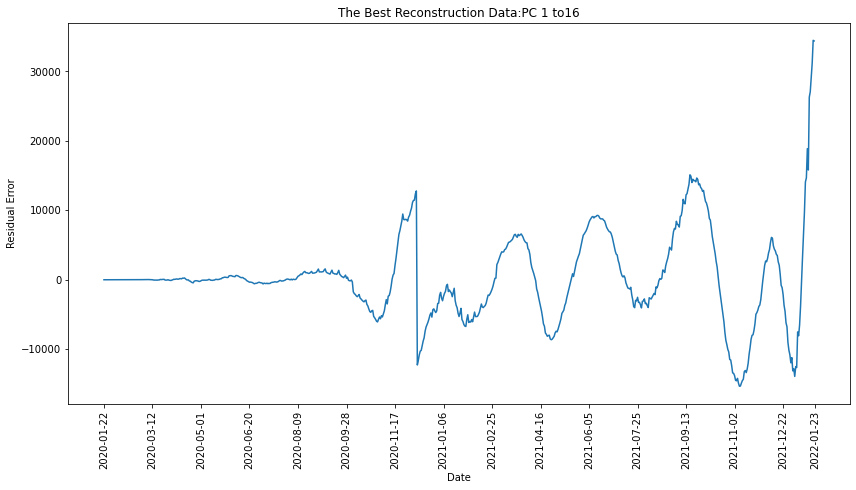

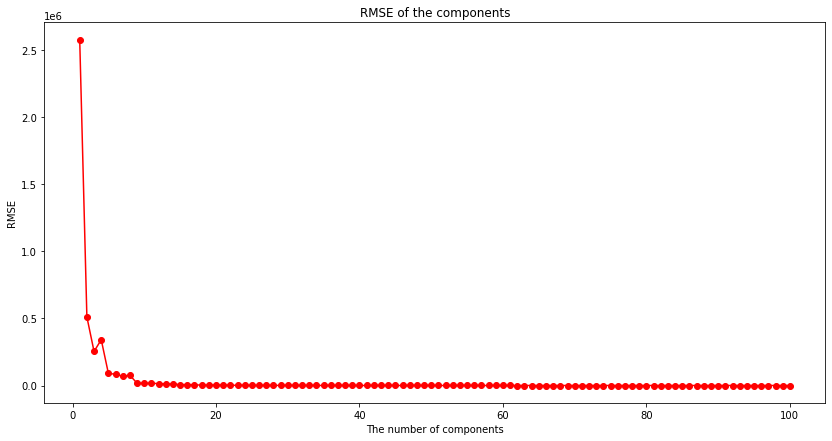

In [14]:
# US
plot_country_figures(cases_raw, 'US')

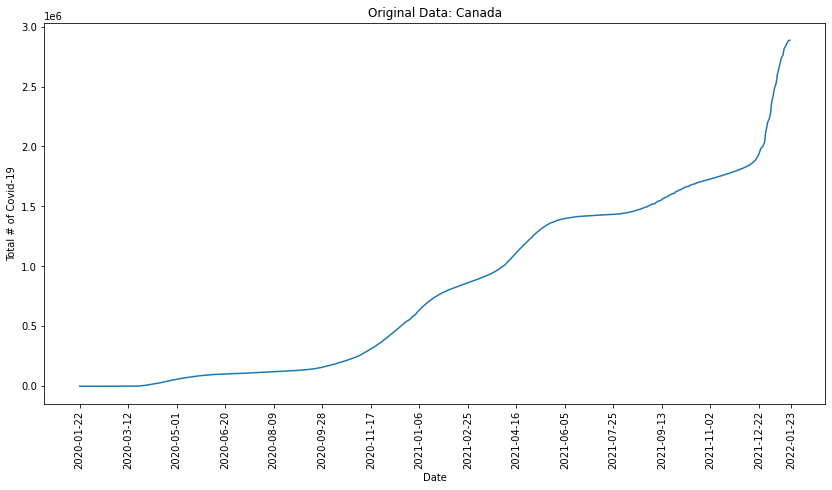

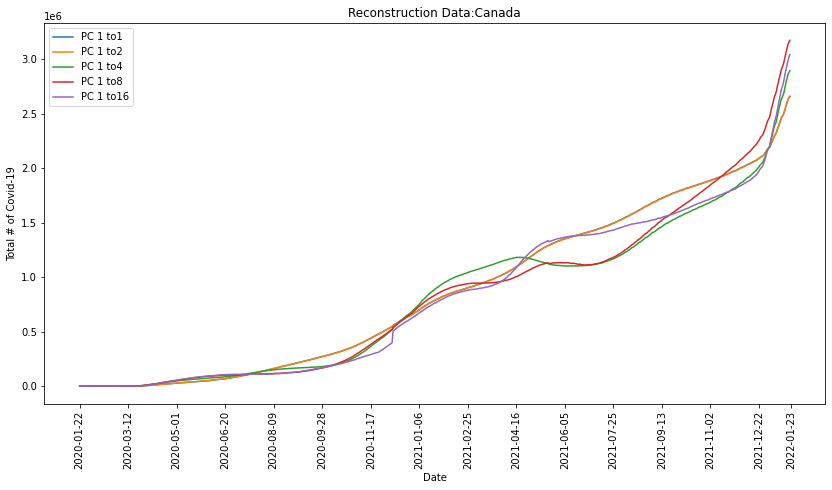

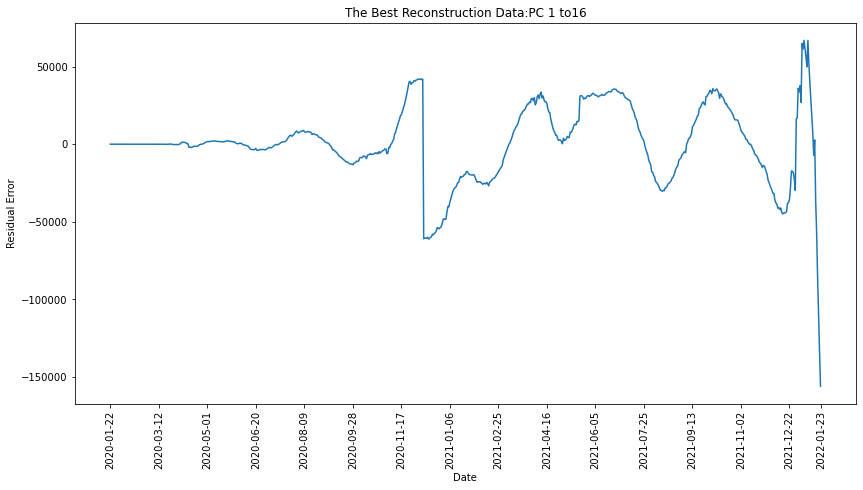

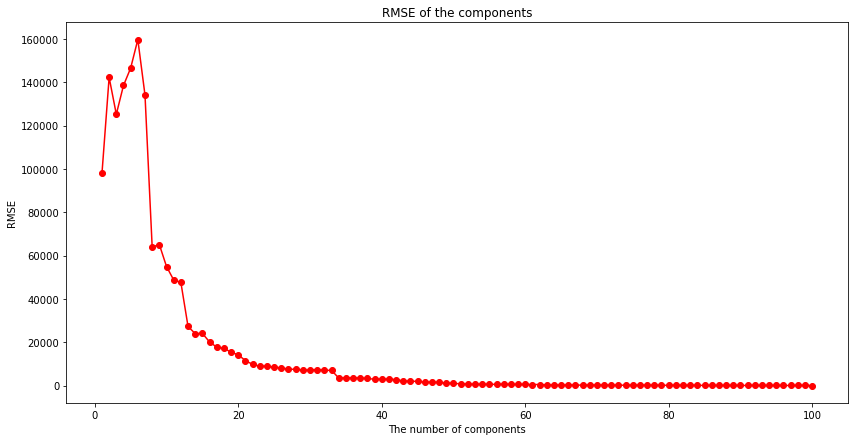

In [15]:
# Canada
plot_country_figures(cases_raw, 'Canada')

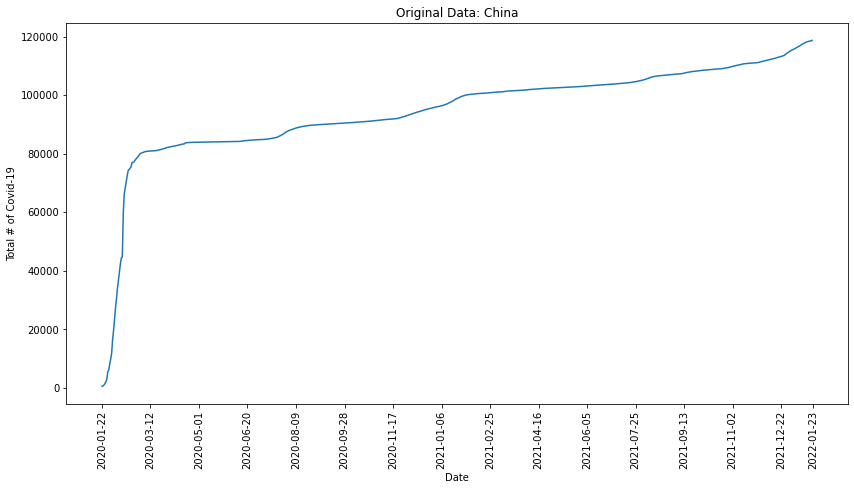

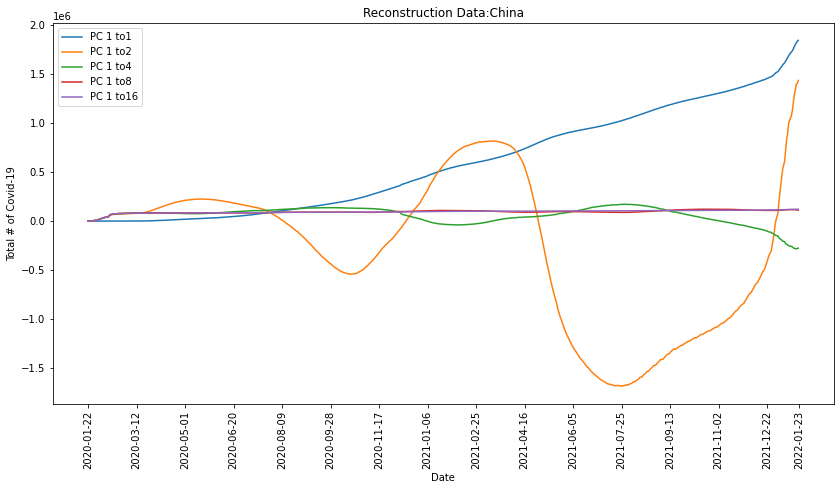

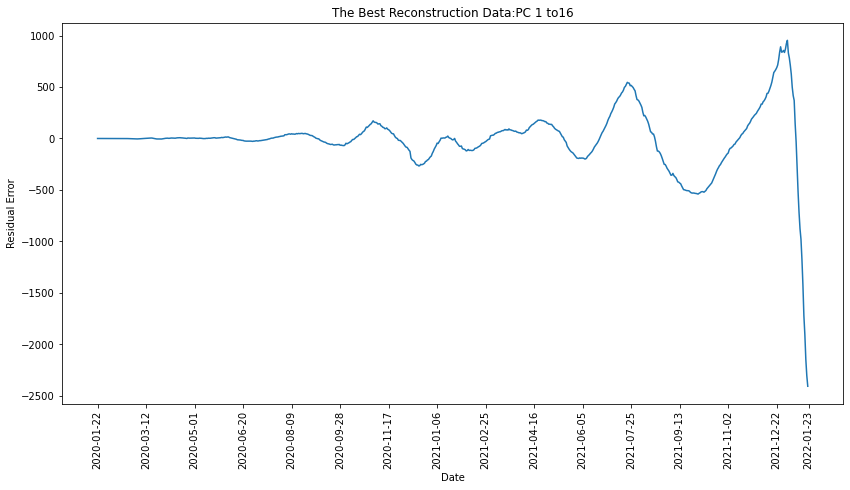

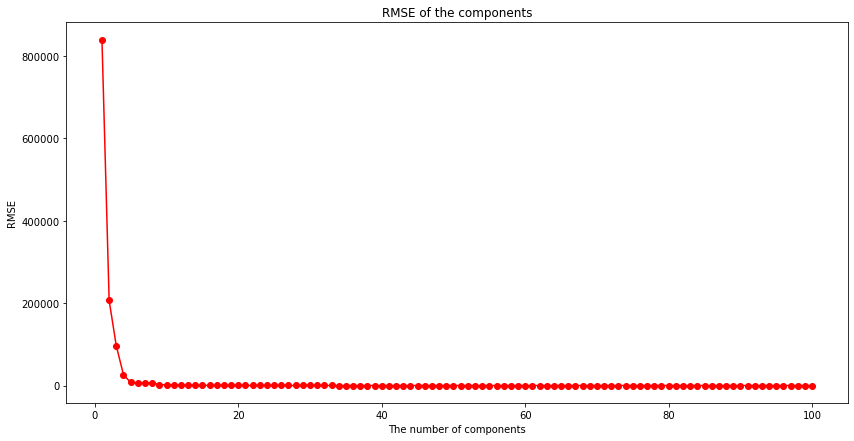

In [16]:
# China
plot_country_figures(cases_raw, 'China')

# Part 4: Fashion-MNIST dataset [4 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.5]**
* Compute Eigenvectors and Eigenvalues. **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [18]:
x.shape

(1000, 784)

Label is: Ankle boot


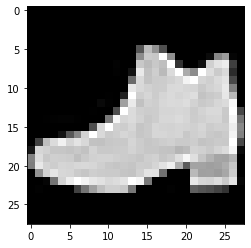

In [19]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(pd.DataFrame(x).loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

Create a new dataset by selecting images from only three categories (three distinct labels).

In [20]:
x = pd.DataFrame(x)
y = pd.Series(y)
y = pd.DataFrame({'Target':y})

# Select the three categories: 5,7,9
new_dataset = pd.concat([x,y],axis=1)
list_5 = new_dataset.loc[new_dataset.Target == '5']
list_7 = new_dataset.loc[new_dataset.Target == '7']
list_9 = new_dataset.loc[new_dataset.Target == '9']
new_dataset = pd.concat([list_5,list_7,list_9],axis=0).sort_index()

In [21]:
# split data table into new data X and new class labels Y
X = new_dataset.iloc[:,:784]
Y = new_dataset.iloc[:,784]

To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why?

Because the variables selected for PCA analysis should relate to each other in terms of co-variability. Then one we explain the percentage of variability in one variable with respect to other variables with different eigenvectors If the variables are selected with metric that variables are different from each oth greatly and few or almost no similaritues, we will be hard to explain in terms of the metric that mentioned above.

Compute Eigenvectors and Eigenvalues.

In [22]:
X.shape

(314, 784)

In [23]:
scalered_data = StandardScaler().fit_transform(X)
scalered_data = pd.DataFrame(scalered_data, index = X.index, columns = X.columns)
covariance_matrix = np.cov(scalered_data.T)
eigenValues, eigenVectors = get_sorted_eigen(covariance_matrix)
print('Eigenvectors are:',eigenVectors)
print('Eigenvalues are:',eigenValues)

Eigenvectors are: [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.01694977 -0.03774805  0.0293935  ... -0.00467807  0.00306629
  -0.00086925]
 [ 0.0027618  -0.02576821  0.01691757 ...  0.00995301 -0.00275313
  -0.00262367]
 [ 0.01064332 -0.00911305  0.00587823 ...  0.0079902  -0.00050668
  -0.00245786]]
Eigenvalues are: [ 1.67413160e+02  8.16489340e+01  6.60724906e+01  5.37610646e+01
  2.68731319e+01  2.28666247e+01  1.62994773e+01  1.51112166e+01
  1.30618147e+01  1.19828185e+01  1.12621218e+01  9.66105524e+00
  9.34383911e+00  8.62618578e+00  8.24771003e+00  7.85836074e+00
  7.17107062e+00  6.87832951e+00  6.37187526e+00  6.08699645e+00
  5.82853648e+00  5.47814389e+00  5.22417367e+00  5.02725506e+00
  4.85333514e+00  4.50291671e+00  4.42977995e+00  4.34778892e+00
  4.11113379e+00  3.86432771e+00  3.812706

Plot the first 10 eigenvectors (as images similar to eigenfaces).

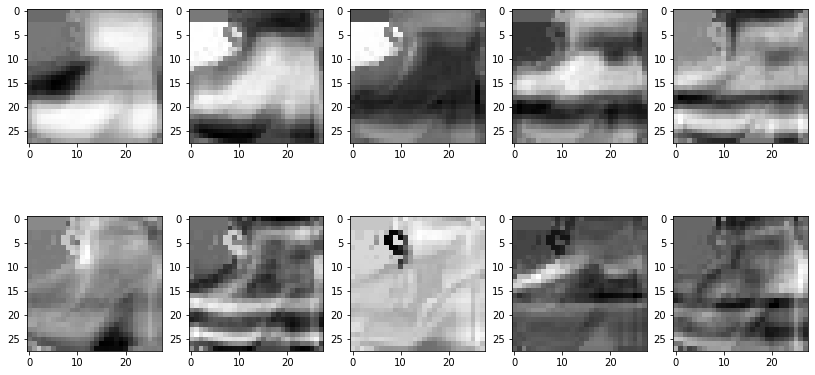

In [24]:
plt.figure(figsize = (14,7))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(eigenVectors[:,i].reshape(-1,28),  cmap = plt.cm.gray)

What trends do you observe?

Each eigenvector capture/has its own feature/characteristics. And see by the plots above, we can find that each plot highlights its own characteristics.

Create a function that requires an argument  𝑛  and plots a random image from the dataset, as well as a reconstruction with the first  𝑛  th principal components

In [25]:
def random_and_reconstruction(dataframe, n):
        
    scalered_data = StandardScaler().fit_transform(dataframe)
    scalered_data = pd.DataFrame(scalered_data, index = dataframe.index, columns = dataframe.columns)
    covariance_matrix = np.cov(scalered_data.T)
    eigenValues, eigenVectors = get_sorted_eigen(covariance_matrix)
    
    random_image_index = random.randint(0,dataframe.shape[0])
    data = X.values[random_image_index]
    
    W = eigenVectors[:, 0:n]
    projX = np.dot(data, W)
    ReconX = np.dot(projX, W.T)
    
    plt.imshow(ReconX.reshape(-1,28), cmap=plt.cm.gray)

Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. 

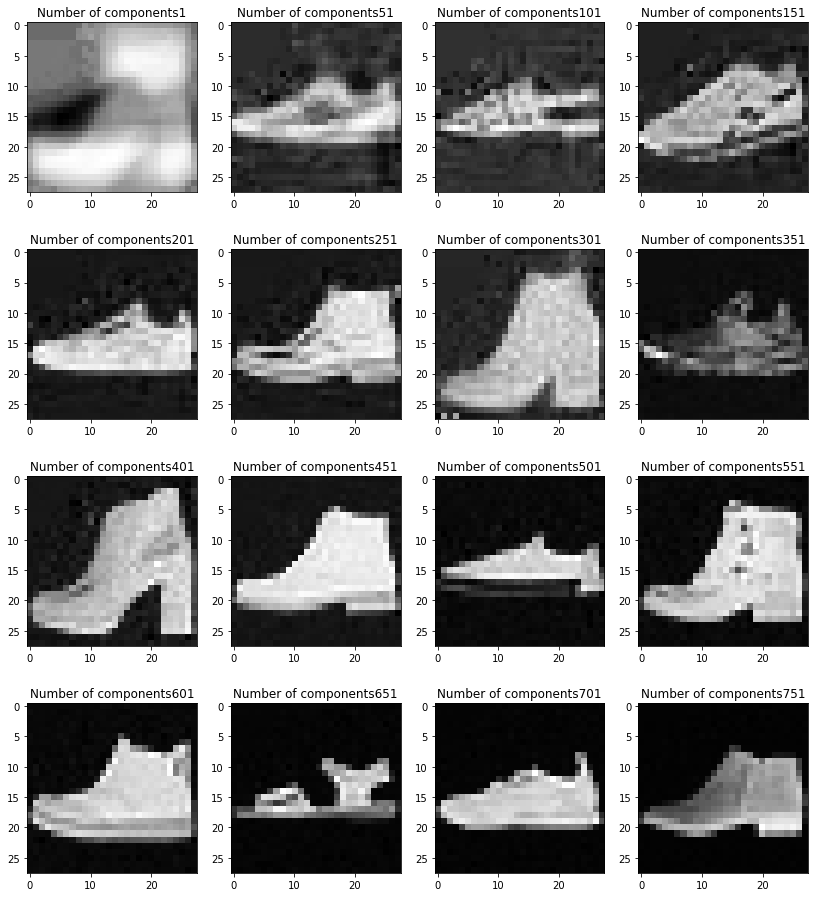

In [26]:
component_list = []
for i in range(1, 784, 50):
    component_list.append(i)

plt.figure(figsize = (14,16))
for j in range(0,len(component_list)):
    plt.subplot(4,4,j+1)
    random_and_reconstruction(X, component_list[j])
    plt.title('Number of components'+str(component_list[j]))

After running the function a few times, I find that the number of components are required so that we (humans!) can identify the items is 151.

What would be the compression ratio for a dataset with 1000 images? 

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

